In [161]:
import numpy as np # np 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 하는 패키지 가져오는거 
from sklearn.model_selection import train_test_split
import pandas as pd # 데이터 변(전)환 
import seaborn as sns
df = pd.read_csv(r"C:\Users\a5365\OneDrive\바탕 화면\coding\데이터 파일\wiscbcdata.csv",index_col=0)# 데이터 불러오기
print(df)

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          s

In [136]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [138]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [139]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

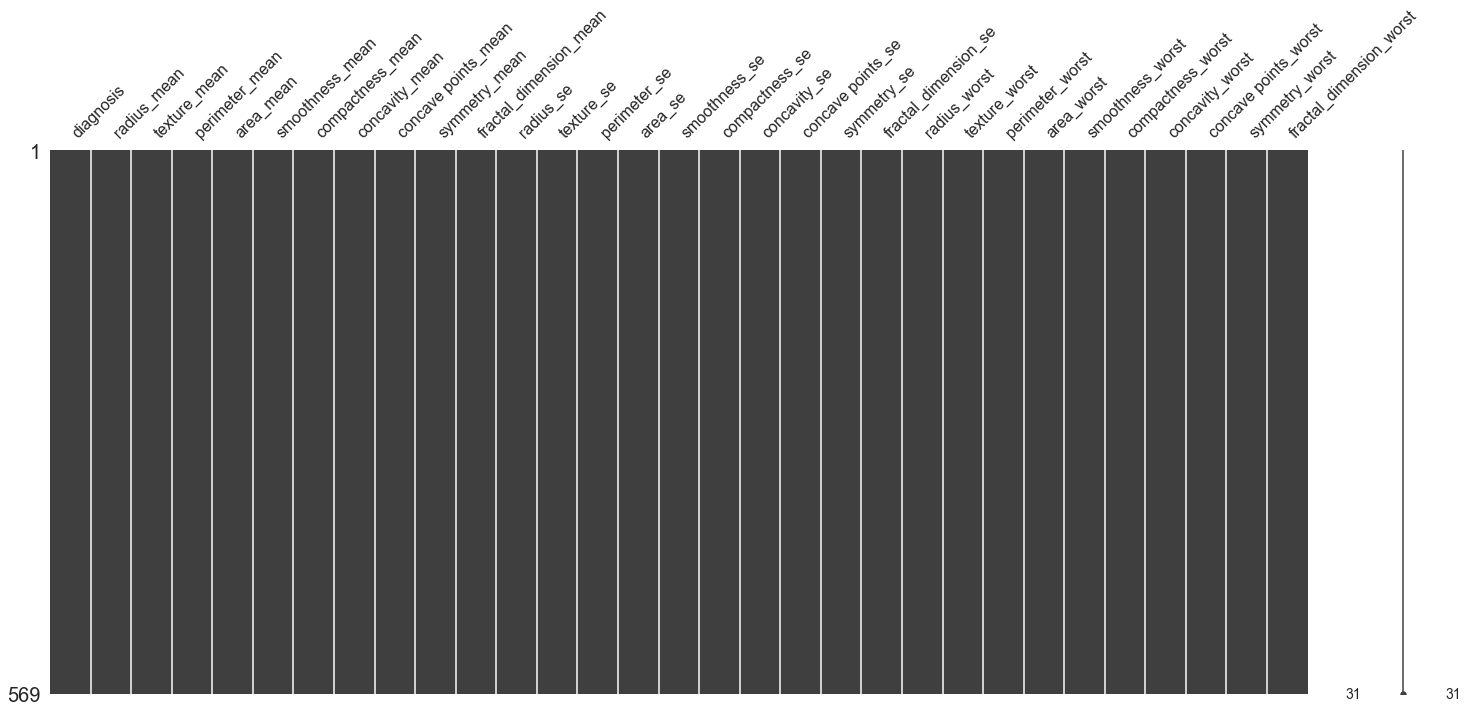

In [140]:
import missingno as msno
msno.matrix(df)
plt.show()

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


C:\Users\a5365\anaconda3\anconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


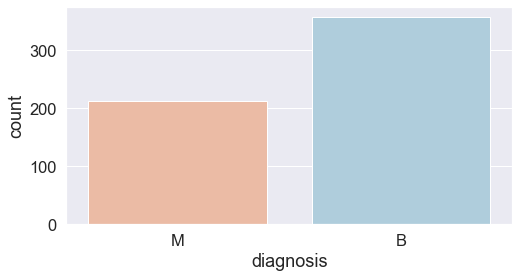

In [141]:
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# 각 클래스 마다 숫자 세기
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

In [142]:
numericals=df.select_dtypes(include='number').columns

In [143]:
numericals=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [144]:
def histogram(df,numericals,hues,title):
    sns.color_palette("husl", 8)
    sns.set_style('darkgrid')
    count=1
    plt.subplots(figsize=(30, 25))
    for i in numericals:
        plt.subplot(8,4,count)
        ax = plt.gca()  
        sns.set(font_scale = 1.5)
        sns.histplot(x=df[i],kde=True,bins=50, hue=hues,palette="Set2", linewidth=2.5,color='g')
        plt.xticks(rotation=90)
        ax.set_title("Distribution of {}".format(i), fontsize=23)
        count+=1 
        plt.tight_layout()
    plt.suptitle(title, y=1.03, fontsize=30)
    plt.show()

In [145]:
hues=df['diagnosis']
title='distribution of cancer type'

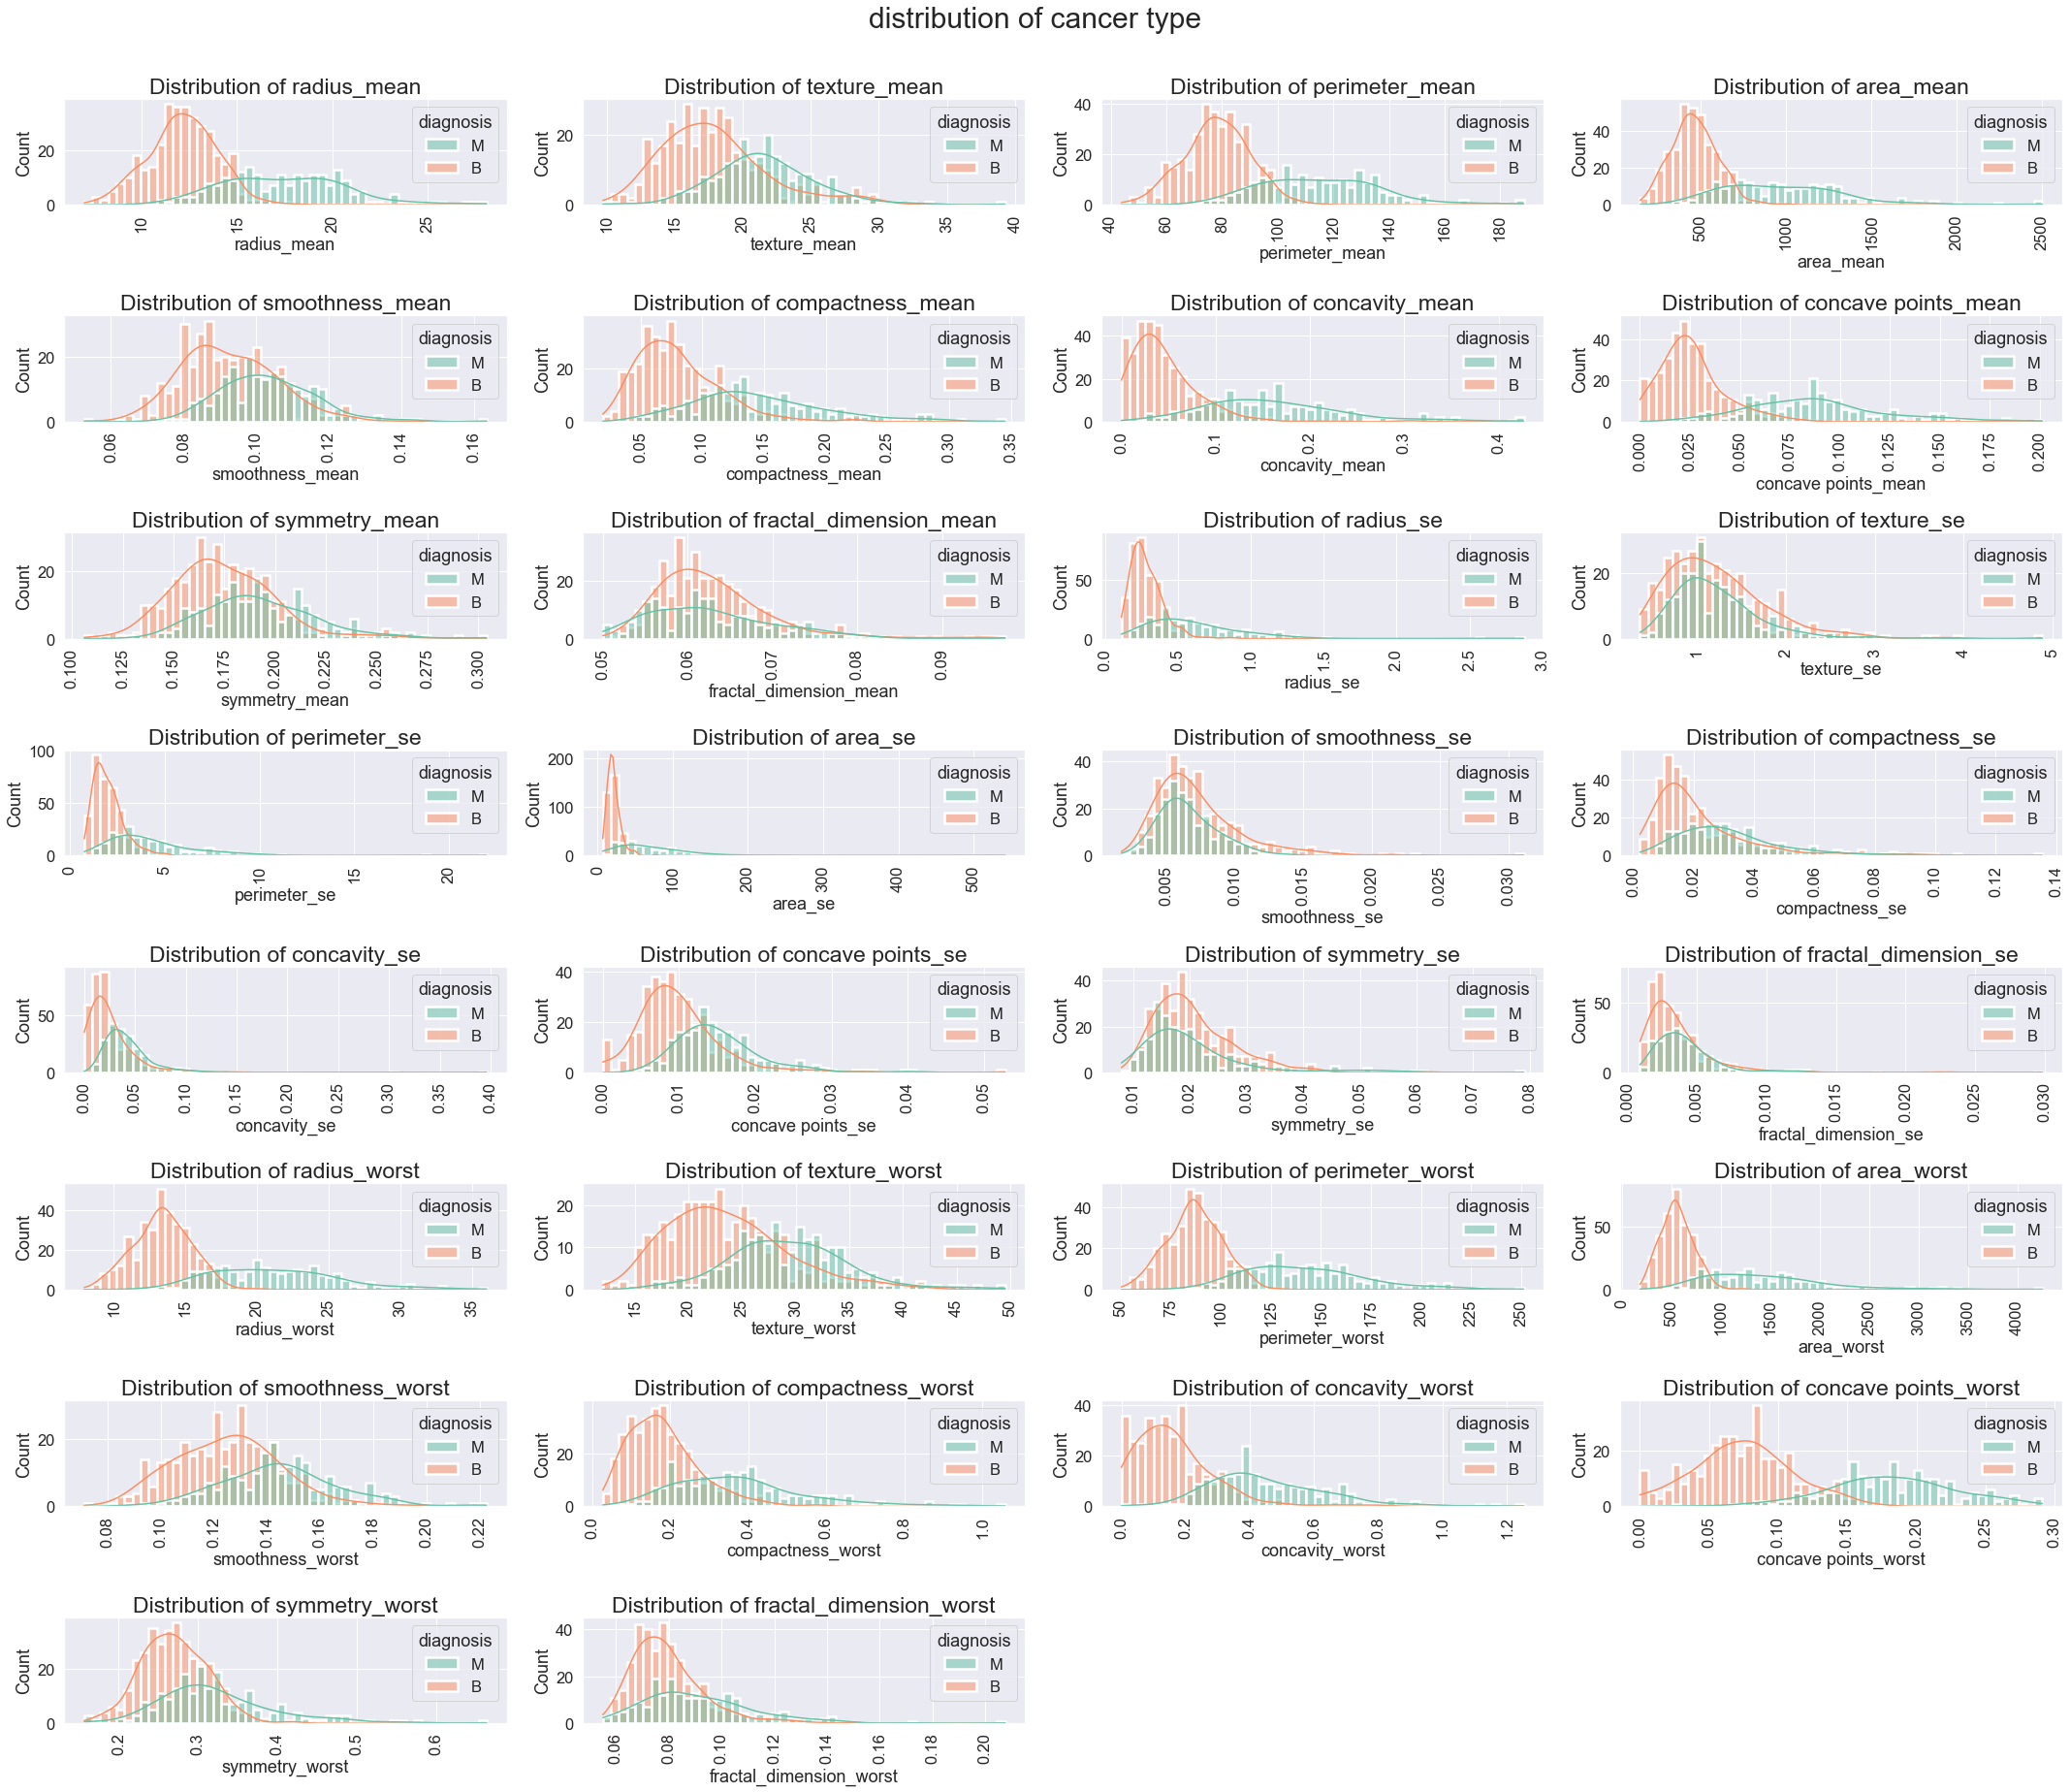

In [146]:
histogram(df,numericals,hues,title)

C:\Users\a5365\AppData\Local\Temp\ipykernel_5580\3758546075.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


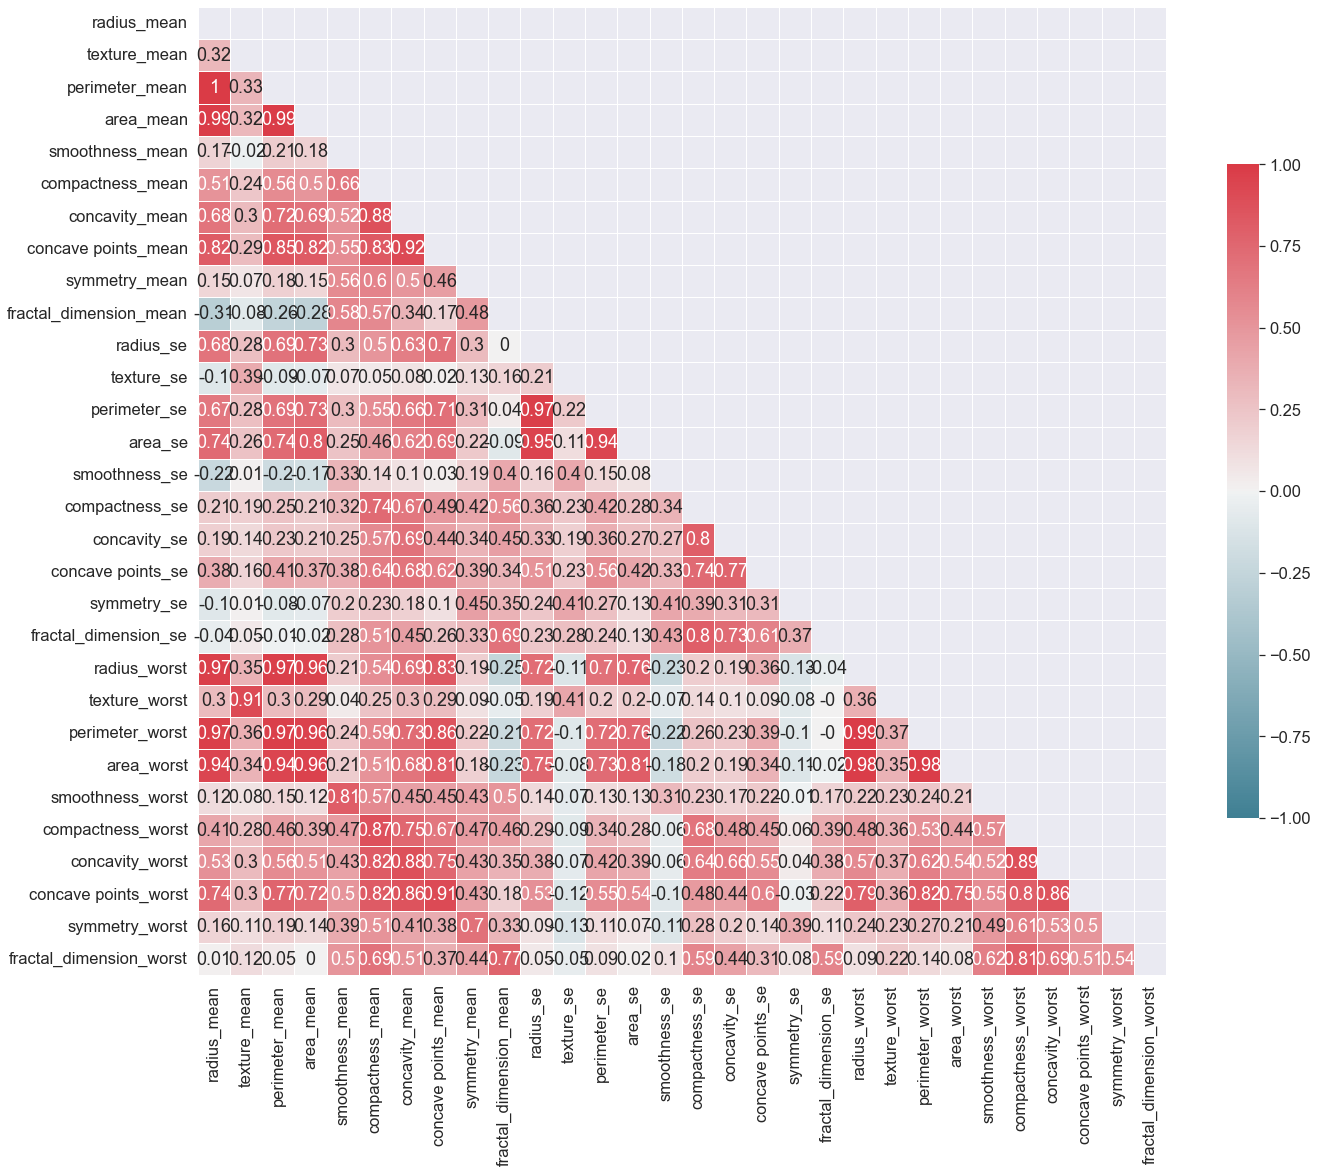

In [147]:
# 상관 행렬 생성 및 시각화
corr = df.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 사이즈 설정
f, ax = plt.subplots(figsize=(20, 20))

# 맵 설정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [162]:
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)


cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)


df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

C:\Users\a5365\AppData\Local\Temp\ipykernel_5580\148293325.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


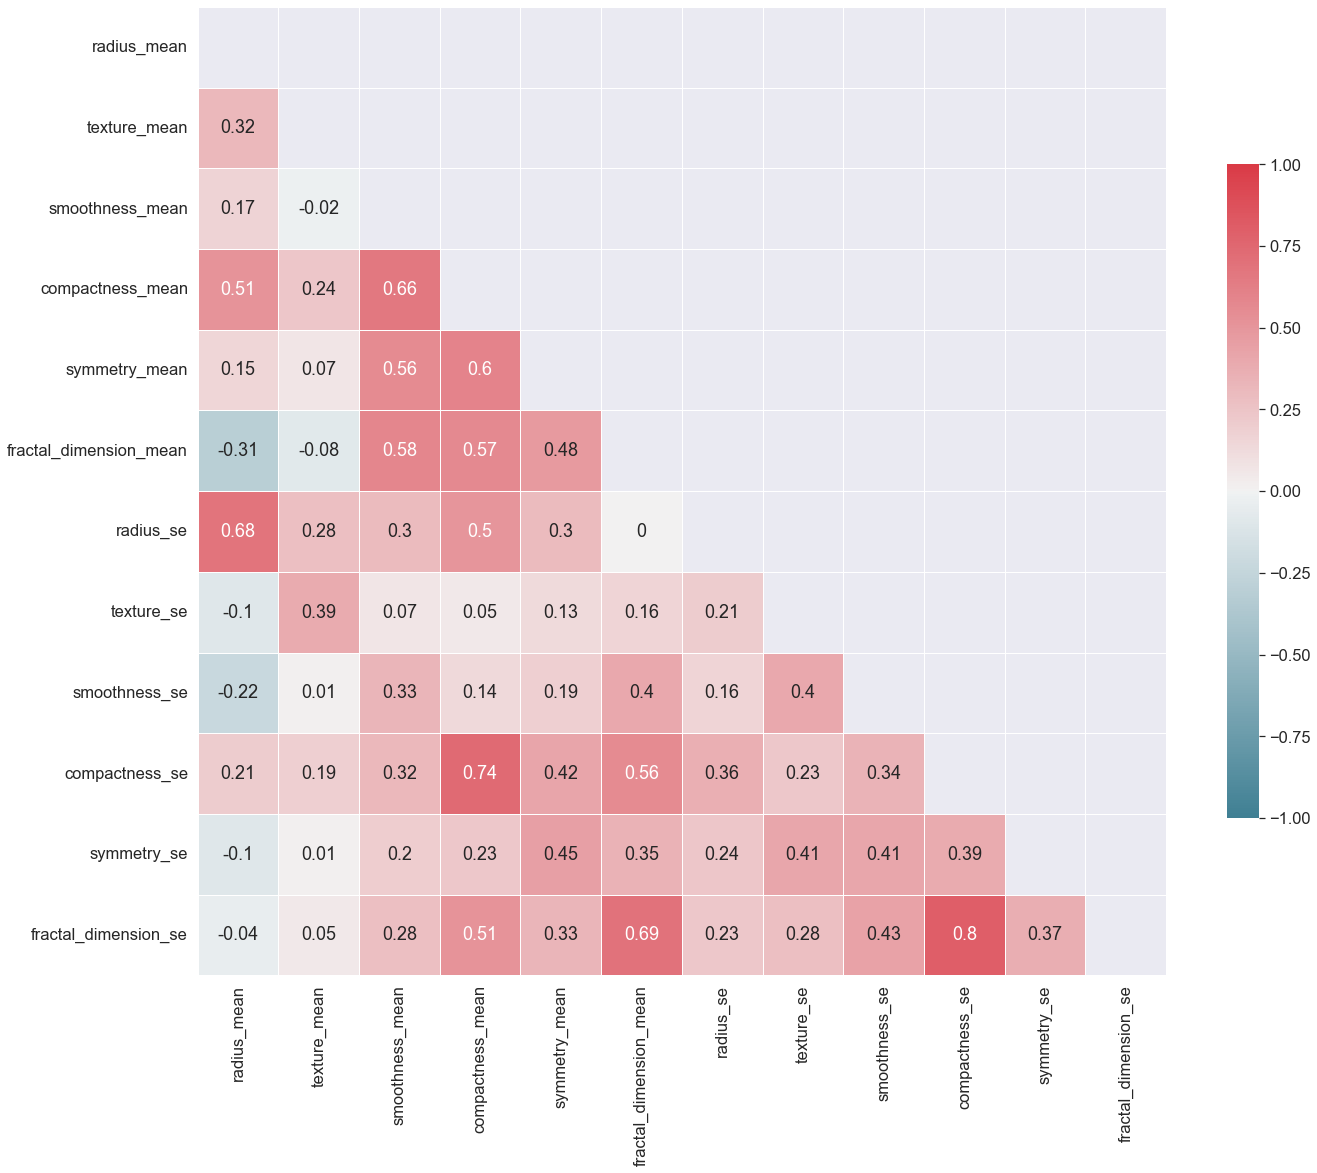

In [149]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [193]:
df = pd.read_csv(r"C:\Users\a5365\OneDrive\바탕 화면\coding\데이터 파일\wiscbcdata.csv",index_col=0)

In [168]:
df['diagnosis']=df['diagnosis'].replace({'B': 0, 'M': 1})

In [169]:
X=df.drop(columns='diagnosis')
y=df['diagnosis']

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [171]:
random_state = 12
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,shuffle = True,random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.9181286549707602

In [172]:
df_corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [173]:
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst']

In [174]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)

,VIF,Tolerance
concave points_worst,17.130560,0.058375
perimeter_worst,204.329679,0.004894
concave points_mean,34.546872,0.028946
radius_worst,391.471018,0.002554
perimeter_mean,1519.882563,0.000658
area_worst,169.931222,0.005885
radius_mean,1606.575820,0.000622
area_mean,200.004550,0.005000
concavity_mean,30.806430,0.032461
concavity_worst,14.417687,0.069359


In [175]:
features = [
    'concave points_worst',
    'radius_mean',
    'concavity_mean',
]
calculate_vif(df,features)

,VIF,Tolerance
concave points_worst,4.759243,0.210117
radius_mean,2.266584,0.441193
concavity_mean,3.917617,0.255257


In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features]            # get the reduced features in the 
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.847953216374269

C:\Users\a5365\anaconda3\anconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


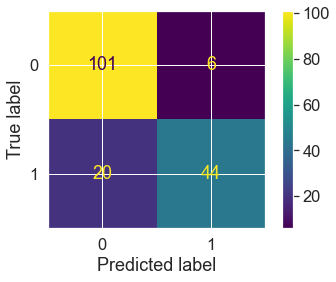

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
clf=log_reg
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [180]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X=df.drop(columns='diagnosis')
y=df['diagnosis']
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [181]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [182]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]



In [183]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



Text(0, 0.5, 'Explained variance (%)')

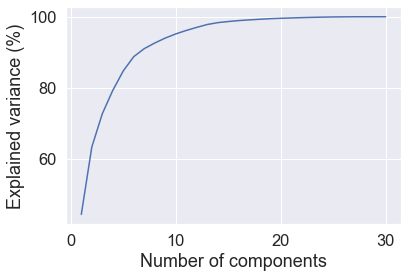

In [184]:
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components: 6


Text(0, 0.5, 'Explained variance (%)')

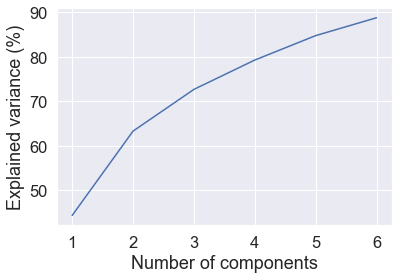

In [185]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [186]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

In [187]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['concavity_mean', 'compactness_mean', 'concavity_worst', 'smoothness_mean']
Component 1: ['symmetry_mean', 'symmetry_se', 'symmetry_worst', 'diagnosis']
Component 2: ['radius_se', 'area_se', 'concave points_se', 'concave points_worst']
Component 3: ['radius_worst', 'radius_mean', 'radius_se', 'area_mean']
Component 4: ['area_mean', 'compactness_se', 'area_worst', 'concave points_mean']
Component 5: ['concave points_worst', 'concave points_se', 'area_worst', 'concave points_mean']


In [188]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


In [189]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [190]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression())])

In [191]:
y_pred=log_regress_model.predict(X_test)

In [192]:
log_regress_model.score(X_test,y_test)

0.9707602339181286